# Phase 1 Progress

## Preprocess of dataset

The dataset of this assignments is from the file 'data/fake_or_real_news.csv', which contains thousands of news within. The very first opeartion I did is to trans the title_vectors from string into float list, because the although the string is made up of figures, it can not be processed before transfer into an parameter that can be use. And after that, I use 1 and 0 instead of Fake and Real in lebal column. And then I call the describe function... not for much use, I think.

In [1]:
import pandas as pd
df = pd.read_csv('data/fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


In [2]:
list_str = lambda i: i.strip('[').strip(']').split()
list_float = lambda i: [float(j) for j in i]
str_to_list_float = lambda i: list_float(list_str(i))
df.title_vectors = df.title_vectors.apply(str_to_list_float)
df.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[0.011533764, 0.0042144405, 0.019692603, 0.061..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[0.11267698, 0.02518966, -0.00212591, 0.021095..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[0.04253004, 0.04300297, 0.01848392, 0.0486721..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[0.10801624, 0.11583211, 0.02874823, 0.0617321..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[0.0169016439, 0.00713498285, -0.00781233795, ..."


In [3]:
label_trans = lambda i: 0 if i == 'FAKE' else 1
df.label = df.label.apply(label_trans)
df.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[0.011533764, 0.0042144405, 0.019692603, 0.061..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[0.11267698, 0.02518966, -0.00212591, 0.021095..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,"[0.04253004, 0.04300297, 0.01848392, 0.0486721..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[0.10801624, 0.11583211, 0.02874823, 0.0617321..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,"[0.0169016439, 0.00713498285, -0.00781233795, ..."


In [4]:
import numpy as np
df.describe(include=[np.number])

,Unnamed: 0,label
count,6335.000000,6335.000000
mean,5280.415627,0.500552
std,3038.503953,0.500039
min,2.000000,0.000000
25%,2674.500000,0.000000
50%,5271.000000,1.000000
75%,7901.000000,1.000000
max,10557.000000,1.000000


In [5]:
x = np.array(df.title_vectors.apply(lambda x: pd.Series(x)))
y = np.array(df['label']) 

## Split the dataset

Just like the operation we did in lecture 1, I also use the 0.33 as the ratio of training set and testing set. I choose 2 as the random seed of spliting operation.

In [6]:
from sklearn.model_selection import train_test_split
seed = 2
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4244, 300) (2091, 300) (4244,) (2091,)


## Logistic regression

The first method I use is logistic regression. It is pretty fast than the other method and give us an 0.79 accuracy by calculating that modal out. Consider the time spend it turns out the logistic regression model is pretty acceptable.

In [7]:
import time
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
start1 = time.time()
LR_model = LR_model.fit(x_train, y_train)
end1 = time.time()
LR_model.score(x_test, y_test)

0.7929220468675275

In [8]:
LR_time = end1-start1
LR_time

0.17395877838134766

In [9]:
from sklearn.metrics import classification_report
target_names = ['FAKE', 'REAL']
y_pred = LR_model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       FAKE       0.78      0.81      0.80      1050
       REAL       0.80      0.77      0.79      1041

avg / total       0.79      0.79      0.79      2091



In [10]:
from sklearn.metrics import * 
LR_result = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),
             f1_score(y_test, y_pred), LR_time]
LR_result

[0.7929220468675275,
 0.8027888446215139,
 0.7742555235350624,
 0.7882640586797067,
 0.17395877838134766]

## Random forest

There are so many parameter that we can change in the method of random forest, and I find that the time of model spend is highly correlate to the number of estimator we used, and that make perfect sense to the concept of random forest. The accuracy is a little bit lower than the accuracy of logistic regression and the time is also over 1 sec.

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 20, max_features=20, random_state=seed)
start2 = time.time()
RF_model = RF_model.fit(x_train, y_train)
end2=time.time()
RF_model.score(x_test, y_test)

0.7637494021999044

In [12]:
RF_time = end2 - start2
RF_time

1.2223942279815674

In [13]:
y_pred = RF_model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       FAKE       0.75      0.79      0.77      1050
       REAL       0.78      0.74      0.76      1041

avg / total       0.76      0.76      0.76      2091



In [14]:
RF_result = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),
             f1_score(y_test, y_pred), RF_time]
RF_result

[0.7637494021999044,
 0.7754279959718026,
 0.7396733909702209,
 0.7571288102261554,
 1.2223942279815674]

## XGboost

Last but not least, I use the XGboost model to evaluate the perform of these data. XGboost require a lots of approach attempts, and that use a lot of time so the time spend of XGboost is much higher than the other two models, however, in the other site, that make sure the accuracy of result.

In [15]:
from xgboost import XGBClassifier
start3 = time.time()
XG_model = XGBClassifier(max_depth=7, learning_rate=0.2, 
                        n_estimators=20, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XG_model = XG_model.fit(x_train, y_train)
end3 = time.time()
XG_model.score(x_test, y_test)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.790052606408417

In [16]:
XG_time = end3 - start3
XG_time

4.040902853012085

In [17]:
y_pred = XG_model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

       FAKE       0.78      0.80      0.79      1050
       REAL       0.80      0.78      0.79      1041

avg / total       0.79      0.79      0.79      2091



/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
XG_result = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),
             f1_score(y_test, y_pred), XG_time]
XG_result

[0.790052606408417,
 0.796844181459566,
 0.7761767531219981,
 0.7863746958637469,
 4.040902853012085]

## Plotting

I use three list to store the data of the calculation result, and use pyplot to present three different models. Surprisingly it didn't distribute that much comparing in a large scale, maybe that is because the dataset is not choosing wisely or the data is really connect to each other that does not have much difference. Also, I plot a seperate graph to present time spent in each model.

In [19]:
Y1 = np.array(LR_result[:4])
Y2 = np.array(RF_result[:4])
Y3 = np.array(XG_result[:4])

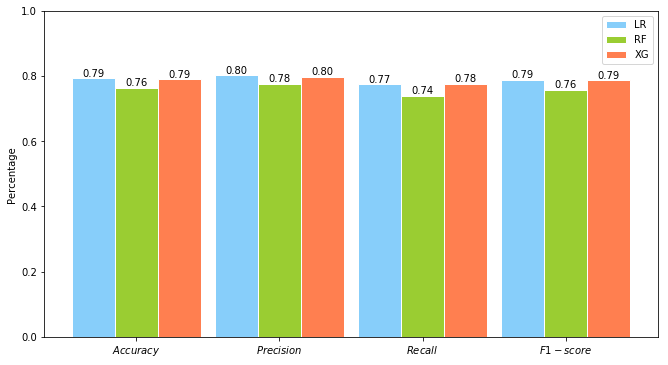

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(11,6))
n = 4
X = np.arange(n)+1
plt.xticks([1.3,2.3,3.3,4.3],[r'$Accuracy$', r'$Precision$', r'$Recall$',r'$F1-score$'])
plt.bar(X,Y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,Y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, Y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XG')
for x,y in zip(X,Y1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
plt.ylabel('Percentage')
plt.ylim(0,+1)
plt.legend()
plt.show()

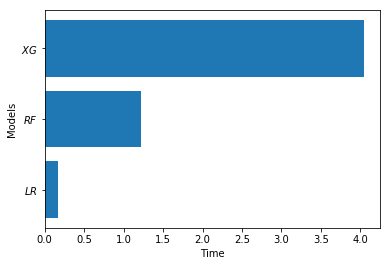

In [27]:
data = [LR_result[4], RF_result[4],XG_result[4]]
plt.barh(range(len(data)), data)
plt.yticks([0,1,2],[r'$LR$', r'$RF$', r'$XG$'])
plt.xlabel('Time')
plt.ylabel('Models')
plt.show()

## Analysis

As can be seen in the graphs above, all four statistics show that LR and XG is better than the RF model, and I believe that by changing more parameter can turn all the value to a higher scale. As for random forest, it's too arbitrary to declare that this modal is a bad attempt for current data. More changing needs to be done in the future.

We can not ingore the time spend in each modal, the XG modal almost spend 10 times longer than the LR modal. No matter how short that time was (approximately 4 sec), with a large dataset to handle, that may cause a lot of time. So in this case, logistic regression is the best modal to present the target data with highest accuracy and minimum time.